In [73]:
## IMPORT CUSTOM CAPSTONE FUNCTIONS
import functions_combined_BEST as ji
import functions_io as io

from functions_combined_BEST import ihelp, ihelp_menu,\
reload, inspect_variables

## IMPORT MY PUBLISHED PYPI PACKAGE 
import bs_ds as  bs
from bs_ds.imports import *

## IMPORT CONVENIENCE FUNCTIONS
from pprint import pprint
import qgrid
import json

# Import plotly and cufflinks for iplots
import plotly
import cufflinks as cf
from plotly import graph_objs as go
from plotly.offline import iplot
cf.go_offline()

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

#Set pd.set_options for tweet visibility
pd.set_option('display.max_colwidth',100)
pd.set_option('display.max_columns',50)

## Load in test data

In [84]:
df_combined = pd.read_csv('data/_combined_stock_data_with_tweet_preds.csv', index_col=0,parse_dates=True)
model_col_list = ['price','price_shifted', 'ma7', 'ma21', '26ema', '12ema', 'MACD', '20sd', 'upper_band','lower_band', 'ema', 'momentum',
                  'has_tweets','num_tweets','case_ratio', 'compound_score','pos','neu','neg','sentiment_class',
                  'pred_classes','pred_classes_int','total_favorite_count','total_retweet_count']

df_combined = ji.set_timeindex_freq(df_combined,fill_nulls=False)
df_combined.sort_index(inplace=True, ascending=True)
df_combined['price_shifted'] =df_combined['price'].shift(-1)

df_to_model = df_combined[model_col_list].copy()
del df_combined
df_to_model.head()

Index When:	Freq:	Index Start		Index End:
Pre-Change	None	2016-12-29 15:30:00	2019-08-23 15:30:00
[i] Post-Change	<CustomBusinessHour: CBH=09:30-16:30>	2016-12-29 15:30:00	2019-08-23 15:30:00

[i] Filled 0# of rows using method ffill
Cols with Nulls:
source                    3500
is_retweet                3509
id_str                    3500
tweet_times               3500
group_content             3500
content_cleaned           3506
content_min_clean         3506
content_cleaned_stop      3521
cleaned_stopped_lemmas    3521
dtype: int64


,price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,date_time.1,int_tweets_for_stocks,int_bins,stock_times,source,is_retweet,id_str,tweet_times,num_tweets,total_retweet_count,total_favorite_count,group_content,has_tweets,has_stocks,has_both,has_RT,starts_RT,content_starts_RT,content_cleaned,content_min_clean,case_ratio,content_hashtags,hashtag_strings,content_mentions,mention_strings,content_cleaned_stop,content_cleaned_stop_tokens,cleaned_stopped_lemmas,sentiment_scores,compound_score,sentiment_class,neg,neu,pos,pred_classes_int,pred_classes,filled_timebin
date_time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-12-29 15:30:00,96.27,96.864898,96.277007,96.573856,96.730494,0.156639,1.002051,98.281110,94.272904,96.263988,89.27,2016-12-29 15:30:00,"(2016-12-29 14:30:00, 2016-12-29 15:30:00]",5,2016-12-29 15:30:00,Twitter for iPhone,False,814484710025994241,2016-12-29 14:54:21,1.0,11330.0,45609.0,My Administration will follow two simple rules: https://t.co/ZWk0j4H8Qy,1,True,True,False,False,[],My Administration will follow two simple rules:,my administration will follow two simple rules,0.04167,[],,[],,administration follow two simple rules,"['administration', 'follow', 'two', 'simple', 'rules']",administration follow two simple rule,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0,2,0.0,1.0,0.0,2,pos,False
2016-12-30 09:30:00,96.38,96.850204,96.293537,96.571218,96.721997,0.150779,0.980655,98.254848,94.332227,96.341329,89.38,2016-12-30 09:30:00,"(2016-12-30 08:30:00, 2016-12-30 09:30:00]",23,2016-12-30 09:30:00,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0,True,False,False,False,[],NaN,NaN,0.00000,[],,[],,NaN,[],NaN,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}",0.0,1,0.0,0.0,0.0,2,pos,False
2016-12-30 10:30:00,96.21,96.831633,96.307891,96.566317,96.709593,0.143275,0.959724,98.227340,94.388442,96.253776,89.21,2016-12-30 10:30:00,"(2016-12-30 09:30:00, 2016-12-30 10:30:00]",24,2016-12-30 10:30:00,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0,True,False,False,False,[],NaN,NaN,0.00000,[],,[],,NaN,[],NaN,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}",0.0,1,0.0,0.0,0.0,2,pos,False
2016-12-30 11:30:00,96.34,96.814286,96.322653,96.563255,96.700645,0.137390,0.938272,98.199196,94.446110,96.311259,89.34,2016-12-30 11:30:00,"(2016-12-30 10:30:00, 2016-12-30 11:30:00]",25,2016-12-30 11:30:00,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0,True,False,False,False,[],NaN,NaN,0.00000,[],,[],,NaN,[],NaN,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}",0.0,1,0.0,0.0,0.0,2,pos,False
2016-12-30 12:30:00,96.25,96.794694,96.336531,96.559027,96.689742,0.130715,0.912397,98.161325,94.511736,96.270420,89.25,2016-12-30 12:30:00,"(2016-12-30 11:30:00, 2016-12-30 12:30:00]",26,2016-12-30 12:30:00,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0,True,False,False,False,[],NaN,NaN,0.00000,[],,[],,NaN,[],NaN,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}",0.0,1,0.0,0.0,0.0,2,pos,False


,price,price_shifted,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,has_tweets,num_tweets,case_ratio,compound_score,pos,neu,neg,sentiment_class,pred_classes,pred_classes_int,total_favorite_count,total_retweet_count
date_time,,,,,,,,,,,,,,,,,,,,,,,,
2016-12-29 15:30:00,96.27,96.38,96.864898,96.277007,96.573856,96.730494,0.156639,1.002051,98.281110,94.272904,96.263988,89.27,1,1.0,0.04167,0.0,0.0,1.0,0.0,2,pos,2,45609.0,11330.0
2016-12-30 09:30:00,96.38,96.21,96.850204,96.293537,96.571218,96.721997,0.150779,0.980655,98.254848,94.332227,96.341329,89.38,0,0.0,0.00000,0.0,0.0,0.0,0.0,1,pos,2,0.0,0.0
2016-12-30 10:30:00,96.21,96.34,96.831633,96.307891,96.566317,96.709593,0.143275,0.959724,98.227340,94.388442,96.253776,89.21,0,0.0,0.00000,0.0,0.0,0.0,0.0,1,pos,2,0.0,0.0
2016-12-30 11:30:00,96.34,96.25,96.814286,96.322653,96.563255,96.700645,0.137390,0.938272,98.199196,94.446110,96.311259,89.34,0,0.0,0.00000,0.0,0.0,0.0,0.0,1,pos,2,0.0,0.0
2016-12-30 12:30:00,96.25,96.25,96.794694,96.336531,96.559027,96.689742,0.130715,0.912397,98.161325,94.511736,96.270420,89.25,0,0.0,0.00000,0.0,0.0,0.0,0.0,1,pos,2,0.0,0.0


## def BlockTimeSeriesSplit

In [75]:
from sklearn.model_selection._split import _BaseKFold

class BlockTimeSeriesSplit(_BaseKFold): #sklearn.model_selection.TimeSeriesSplit):
    """A variant of sklearn.model_selection.TimeSeriesSplit that keeps train_size and test_size
    constant across folds. 
    Requires n_splits,train_size,test_size. train_size/test_size can be integer indices or float ratios """
    def __init__(self, n_splits=5,train_size=None, test_size=None, step_size=None, method='sliding'):
        super().__init__(n_splits, shuffle=False, random_state=None)
        self.train_size = train_size
        self.test_size = test_size
        self.step_size = step_size
        if 'sliding' in method or 'normal' in method:
            self.method = method
        else:
            raise  Exception("Method may only be 'normal' or 'sliding'")
        
    def split(self,X,y=None, groups=None):
        import math 
        method = self.method
        ## Get n_samples, trian_size, test_size, step_size
        n_samples = len(X)
        test_size = self.test_size
        train_size =self.train_size
      
                
        ## If train size and test sze are ratios, calculate number of indices
        if train_size<1.0:
            train_size = math.floor(n_samples*train_size)
        
        if test_size <1.0:
            test_size = math.floor(n_samples*test_size)
            
        ## Save the sizes (all in integer form)
        self._train_size = train_size
        self._test_size = test_size
        
        ## calcualte and save k_fold_size        
        k_fold_size = self._test_size + self._train_size
        self._k_fold_size = k_fold_size    
        

    
        indices = np.arange(n_samples)
        
        ## Verify there is enough data to have non-overlapping k_folds
        if method=='normal':
            import warnings
            if n_samples // self._k_fold_size <self.n_splits:
                warnings.warn('The train and test sizes are too big for n_splits using method="normal"\n\
                switching to method="sliding"')
                method='sliding'
                self.method='sliding'
                              
                  
            
        if method=='normal':

            margin = 0
            for i in range(self.n_splits):

                start = i * k_fold_size
                stop = start+k_fold_size

                ## change mid to match my own needs
                mid = int(start+self._train_size)
                yield indices[start: mid], indices[mid + margin: stop]
        

        elif method=='sliding':
            
            step_size = self.step_size
            if step_size is None: ## if no step_size, calculate one
                ## DETERMINE STEP_SIZE
                last_possible_start = n_samples-self._k_fold_size #index[-1]-k_fold_size)\
                step_range =  range(last_possible_start)
                step_size = len(step_range)//self.n_splits
            self._step_size = step_size
                
            
            for i in range(self.n_splits):
                if i==0:
                    start = 0
                else:
                    start = prior_start+self._step_size #(i * step_size)

                stop =  start+k_fold_size            
                ## change mid to match my own needs
                mid = int(start+self._train_size)
                prior_start = start
                yield indices[start: mid], indices[mid: stop]


In [77]:
split_ts = BlockTimeSeriesSplit(n_splits = 5, train_size=0.3,test_size=0.1,method='sliding')#train_size=840, test_size=10*7)
master_date_index=df_to_model.index.to_series()
n=0
dashes = '---'*20
for train_index, test_index in split_ts.split(df_to_model):  
    
    print(f'\n{dashes}\nsplit {n}')
    train_date_index = master_date_index.iloc[train_index]
    test_date_index = master_date_index.iloc[test_index]
    ji.index_report(train_date_index)
    ji.index_report(test_date_index)
    n+=1


------------------------------------------------------------
split 0
------------------------------------------------------------
	INDEX REPORT:	
------------------------------------------------------------
* Index Endpoints:
	2016-12-29 15:30:00 -- to -- 2017-10-17 09:30:00
* Index Freq:
	<CustomBusinessHour: CBH=09:30-16:30>
------------------------------------------------------------
	INDEX REPORT:	
------------------------------------------------------------
* Index Endpoints:
	2017-10-17 10:30:00 -- to -- 2018-01-22 09:30:00
* Index Freq:
	<CustomBusinessHour: CBH=09:30-16:30>

------------------------------------------------------------
split 1
------------------------------------------------------------
	INDEX REPORT:	
------------------------------------------------------------
* Index Endpoints:
	2017-04-25 14:30:00 -- to -- 2018-02-08 15:30:00
* Index Freq:
	<CustomBusinessHour: CBH=09:30-16:30>
------------------------------------------------------------
	INDEX REPORT:	
---

### Using Pipeline to Prepare Data for Modeling

In [78]:
## Using ColumnTransformer
from sklearn.model_selection import TimeSeriesSplit,train_test_split, GridSearchCV,cross_val_score,KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer, make_column_transformer 
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


import xgboost as xgb
target_col= 'price_shifted'
## Sort_index
cols_to_drop =['price','pred_classes_int']
cols_to_drop.append(target_col)

# df_to_model.drop(cols_to_drop,axis=1,inplace=True)

features = df_to_model.drop(cols_to_drop, axis=1)
target = df_to_model[target_col]



## Get boolean masks for which columns to use
numeric_cols = features.dtypes=='float'
category_cols = ~numeric_cols
# target_col = df_to_model.columns=='price_shifted'


price_transformer = Pipeline(steps=[
    ('scaler',MinMaxScaler())
])


## define pipeline for preparing numeric data
numeric_transformer = Pipeline(steps=[
#     ('imputer',SimpleImputer(strategy='median')),
    ('scaler',MinMaxScaler())
])

category_transformer = Pipeline(steps=[
#     ('imputer',SimpleImputer(missing_values=np.nan,
#                              strategy='constant',fill_value='missing')),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])


## define pipeline for preparing categorical data
preprocessor = ColumnTransformer(remainder='passthrough',
                                 transformers=[
                                     ('num',numeric_transformer, numeric_cols),
                                     ('cat',category_transformer,category_cols)])

In [79]:

### ADDING MY OWN TRANSFORMATION SO CAN USE FEATUREA IMPROTANCE
df_tf =pd.DataFrame()
num_cols_list = numeric_cols[numeric_cols==True]
cat_cols_list = category_cols[category_cols==True]
# num_cols = df_to_model.columns

for col in df_to_model.columns:
    
    if col in num_cols_list:
        print(f'{col} is numeric')
        vals = df_to_model[col].values
        tf_num = numeric_transformer.fit_transform(vals.reshape(-1,1))
        
        try:
            df_tf[col] = tf_num.flatten()
            print(f"{col} added")
        except:
            print('Error')
            print(tf_num.shape)
#             print(tf_num[:10])
        
    if col in cat_cols_list:
        print(f'{col} is categorical')
#         colnames=[]
#         vals = df_to_model[col].values
#         print(vals.shape)
#         tf_cats = category_transformer.fit_transform(vals.reshape(-1,1))
#         print(tf_cols.shape)
#         print(col,'\n',tf_cats)
        
#         [colnames.append(f"{col}_{i}") for i in range(tf_cats.shape[1])]
#         print(colnames)
        
        df_temp = pd.get_dummies(df_to_model[col])#DataFrame(data=tf_cats[:],index=df_to_model.index)
#         display(df_temp.head())
#         df_temp.columns = 
#         colnames = [for i in range(tf_cols.shape[1])]
        df_tf = pd.concat([df_tf,df_temp],axis=1)

#     ('target',price_transformer,target_col)])
    

# reg = Pipeline(steps=[('preprocessor',preprocessor),
#                      ('regressor',xgb.XGBRegressor(random_state=42))])
df_tf.head()

ma7 is numeric
ma7 added
ma21 is numeric
ma21 added
26ema is numeric
26ema added
12ema is numeric
12ema added
MACD is numeric
MACD added
20sd is numeric
20sd added
upper_band is numeric
upper_band added
lower_band is numeric
lower_band added
ema is numeric
ema added
momentum is numeric
momentum added
has_tweets is categorical
num_tweets is numeric
Error
(4838, 1)
case_ratio is numeric
Error
(4838, 1)
compound_score is numeric
Error
(4838, 1)
pos is numeric
Error
(4838, 1)
neu is numeric
Error
(4838, 1)
neg is numeric
Error
(4838, 1)
sentiment_class is categorical
pred_classes is categorical
total_favorite_count is numeric
Error
(4838, 1)
total_retweet_count is numeric
Error
(4838, 1)


,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,0,1,0,1,2,neg,no_change,pos
0,0.018791,0.000000,0.003526,0.010402,0.686492,0.141494,0.033515,0.036878,0.073543,0.083656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.018152,0.000739,0.003403,0.010025,0.685331,0.136876,0.032455,0.039368,0.076574,0.087916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.017344,0.001380,0.003176,0.009475,0.683844,0.132358,0.031345,0.041728,0.073142,0.081332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.016590,0.002040,0.003035,0.009078,0.682678,0.127728,0.030208,0.044149,0.075395,0.086367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.015738,0.002660,0.002839,0.008594,0.681355,0.122143,0.028679,0.046905,0.073795,0.082881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Using `BlockTimeSeriesSplit`

In [99]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
import xgboost as xgb
from xgboost import plot_importance,plot_tree
reg= xgb.XGBRegressor(random_state=42, n_estimators=500)

# split_ts = TimeSeriesSplit(n_splits=5)#,max_train_size=7*5*6)
split_ts = BlockTimeSeriesSplit(n_splits=5,train_size=0.3,test_size=0.1,method='normal')#train_size=7*5*4*3, test_size = 7*10)

results_list=[]
k=0
date_index = features.index.to_series()

for train_index, test_index in split_ts.split(features):  
    
    df_train = features.iloc[train_index]
    df_test = features.iloc[test_index]
    
    y_train = target.iloc[train_index].values
    y_test = target.iloc[test_index].values
    
    train_date_index = date_index.iloc[train_index]
    test_date_index = date_index.iloc[test_index]
    
    ## Fitting preprocessor to training data, transforming both
    preprocessor.fit(features)
    X_train = preprocessor.transform(df_train)
    X_test = preprocessor.transform(df_test)
    
   
        
    reg.fit(X_train, y_train)
    pred = reg.predict(X_test)
    
    
    
    true_train_series = pd.Series(y_train, index=train_date_index,name='true_train_price')
    true_test_series = pd.Series(y_test, index=test_date_index,name='true_test_price')
    pred_price_series = pd.Series(pred,index=test_date_index,name='pred_test_price')#.plot()
    
    df_xgb = pd.concat([true_train_series,true_test_series,pred_price_series],axis=1)


    try:
    
        df_results = ji.evaluate_regression(true_test_series,pred_price_series,show_results=False);
    
    except:
        print(f"Trouble with k={k}")      
    finally:

        fold_dict = {'k':k,
                     'train_index':train_date_index,
                     'test_index':test_date_index,
                     'results':df_results,
                     'df_model':df_xgb,
                     'model':reg}
        results_list.append(fold_dict)
        k+=1
    #     print('Model Score:',reg.score(X_test,y_test))
    

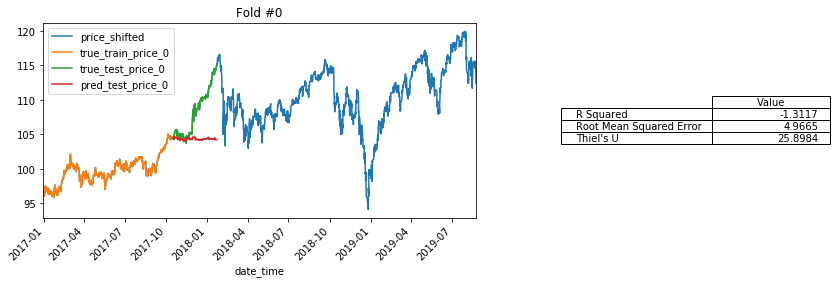

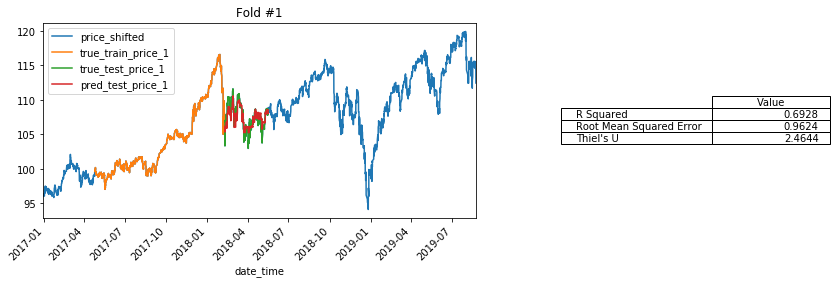

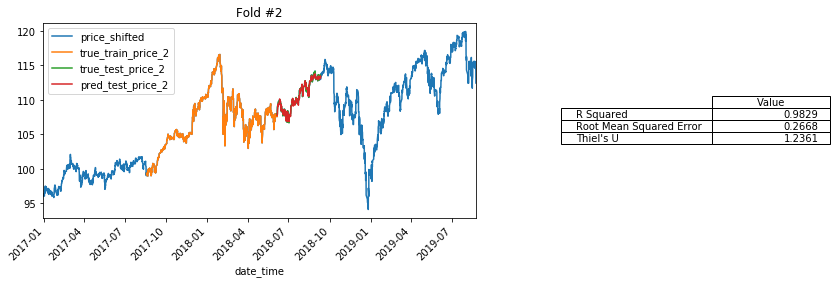

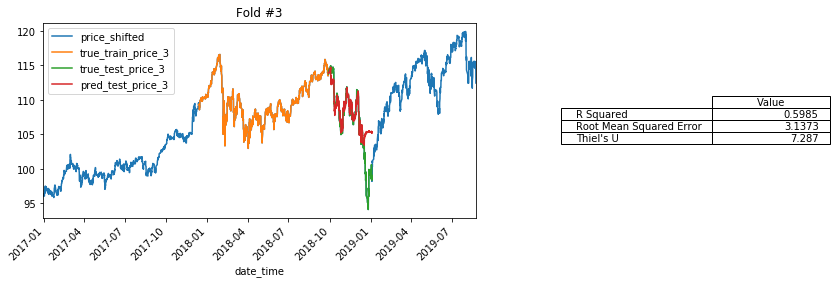

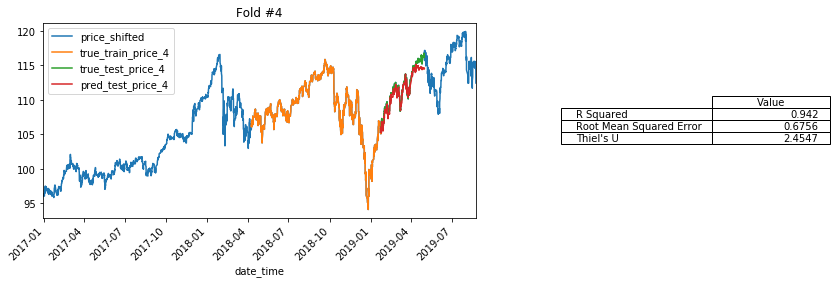

In [100]:
from pandas import plotting
## PLOT ALL TRAIN/TEST SAMPLES ON ONE PLT
for i in range(len(results_list)):
    
    ## get results items 
    k = results_list[i]['k']
    df_model = results_list[i]['df_model'].copy()#
    df_results = results_list[i]['results']

    ## rename columns to identify on same plot
    new_colnames = df_model.columns+f"_{k}"
    df_model.columns  = new_colnames
    
    ## add to df_ind_plots and plot
    df_ind_plots = pd.concat([target.copy(),df_model],axis=1) # reset each time
    

    ## Create fig, axes     #     display(df_results.style.set_caption(f'Fold#{i}'))
    ax1= plt.subplot2grid((1,3),(0,0), colspan=2)
    ax2 =plt.subplot2grid((1,3),(0,2), colspan=1)
    ax2.axis('off')
    fig = plt.gcf()
    
    # Plot data
    df_ind_plots.plot(title=f'Fold #{k}',rot=45,figsize=(12,4),ax=ax1) #table=df_results) 
    # Plot results table
    plotting.table(ax2, colWidths=[0.6, 0.2],data=df_results,loc='right')
    plt.show()   